In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Стиль
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.2f}'.format)

# Загрузка
df = pd.read_csv("../data/processed/daily_merged.csv", parse_dates=['date'], index_col='date')
print(f"Данных: {len(df)} строк | {df.index.min().date()} → {df.index.max().date()}")
print("Колонки:", df.columns.tolist())
df.head()

Данных: 1096 строк | 2022-01-01 → 2024-12-31
Колонки: ['Vgas_m3', 'Qboiler_prod_Gcal', 'air_temp_daily', 'Qgas_ccal_m3', 'T1_c_mean', 'T2_c_mean']


,Vgas_m3,Qboiler_prod_Gcal,air_temp_daily,Qgas_ccal_m3,T1_c_mean,T2_c_mean
date,,,,,,
2022-01-01,13143.00,83.25,-1.90,8121,91.27,50.83
2022-01-02,14814.00,103.86,-7.46,8121,90.95,50.60
2022-01-03,14523.00,106.00,-9.80,8121,90.04,50.14
2022-01-04,13295.00,101.53,-9.22,8121,89.82,50.01
2022-01-05,12394.00,94.07,-7.95,8121,89.11,49.66


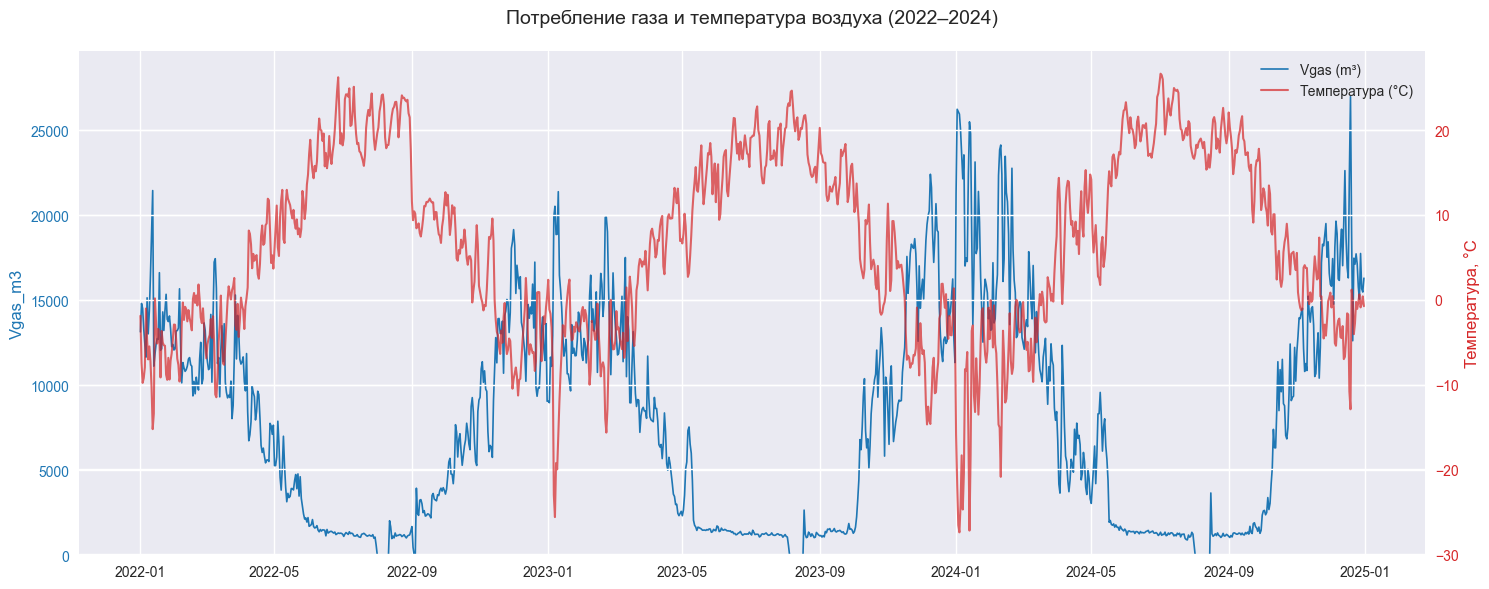

In [2]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Vgas
ax1.plot(df.index, df['Vgas_m3'], color='tab:blue', linewidth=1.2, label='Vgas (m³)')
ax1.set_ylabel('Vgas_m3', color='tab:blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(0, df['Vgas_m3'].max() * 1.1)

# Температура
ax2 = ax1.twinx()
ax2.plot(df.index, df['air_temp_daily'], color='tab:red', alpha=0.7, linewidth=1.5, label='Температура (°C)')
ax2.set_ylabel('Температура, °C', color='tab:red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Заголовок и легенда
plt.title('Потребление газа и температура воздуха (2022–2024)', fontsize=14, pad=20)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

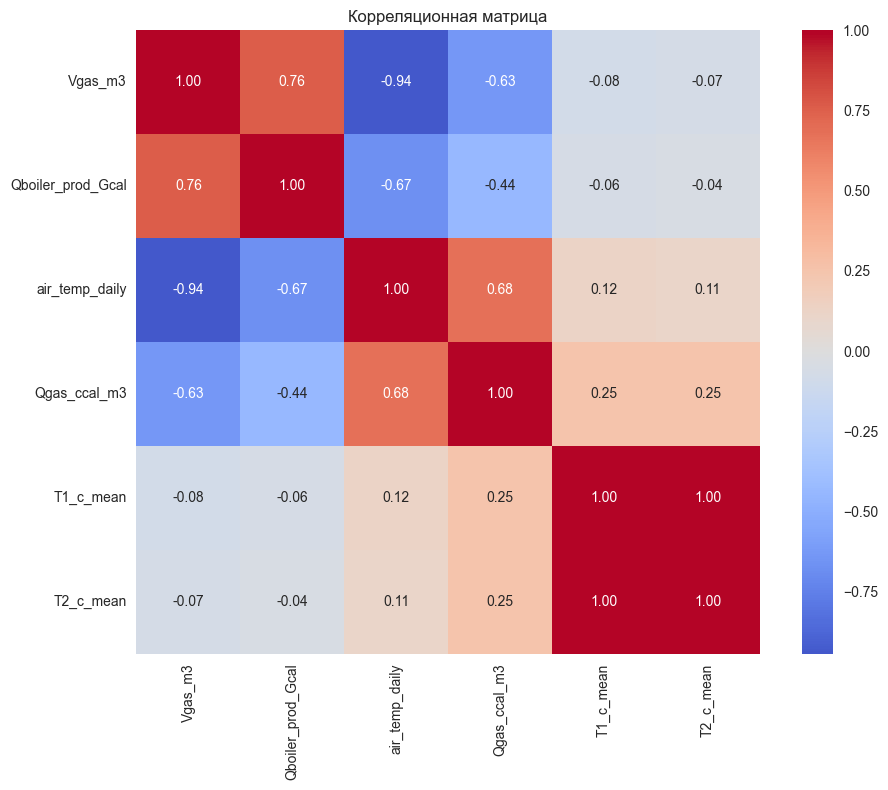

Топ корреляций с Vgas_m3:
Vgas_m3             1.00
air_temp_daily      0.94
Qboiler_prod_Gcal   0.76
Qgas_ccal_m3        0.63
T1_c_mean           0.08
T2_c_mean           0.07
Name: Vgas_m3, dtype: float64


In [3]:
# Выбираем числовые колонки
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

# Вывод топ-корреляций с Vgas
print("Топ корреляций с Vgas_m3:")
print(corr['Vgas_m3'].abs().sort_values(ascending=False).head(6))

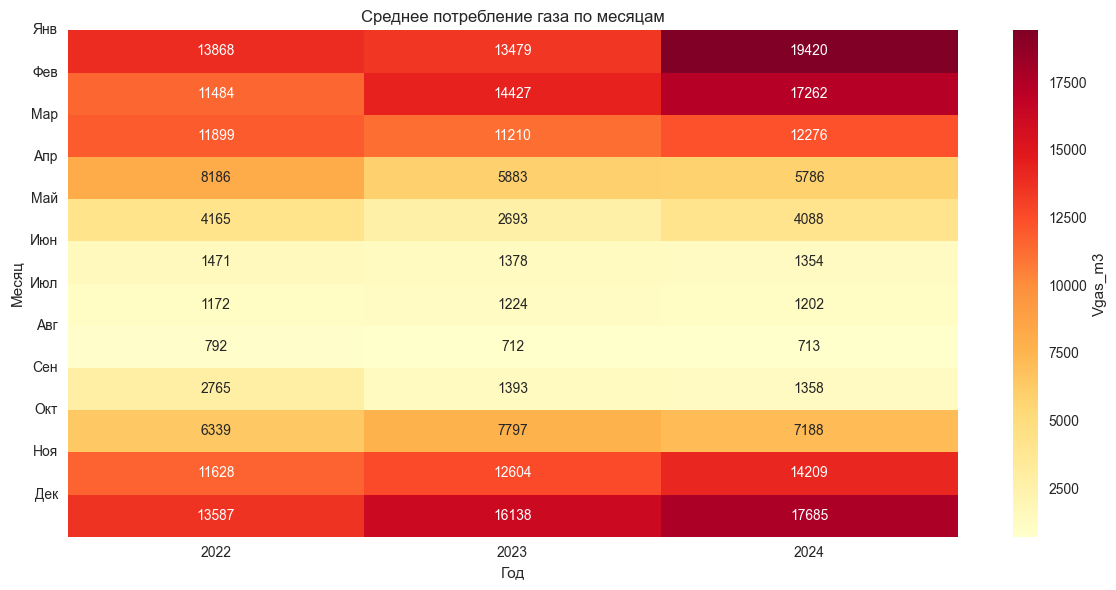

In [4]:
df_month = df.copy()
df_month['month'] = df_month.index.month
df_month['year'] = df_month.index.year

monthly = df_month.groupby(['year', 'month'])['Vgas_m3'].mean().unstack(0)

plt.figure(figsize=(12, 6))
sns.heatmap(monthly, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Vgas_m3'})
plt.title('Среднее потребление газа по месяцам')
plt.xlabel('Год')
plt.ylabel('Месяц')
plt.yticks(ticks=range(0, 12), labels=['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'], rotation=0)
plt.tight_layout()
plt.show()

Основные статистики:


,Vgas_m3,Qboiler_prod_Gcal,air_temp_daily,Qgas_ccal_m3,T1_c_mean,T2_c_mean
count,1096.00,1096.00,1096.00,1096.00,1096.00,1096.00
mean,7722.31,1260.59,6.52,8239.32,87.67,48.41
std,6324.21,1419.03,10.76,108.41,17.09,9.47
min,0.00,0.00,-27.41,8121.00,65.78,34.94
25%,1400.75,86.51,-2.38,8150.00,69.78,38.59
50%,6769.00,286.85,6.92,8189.00,86.46,48.59
75%,12750.25,2573.85,16.49,8336.00,105.57,58.11
max,26980.00,4118.35,26.64,8492.00,111.97,61.47


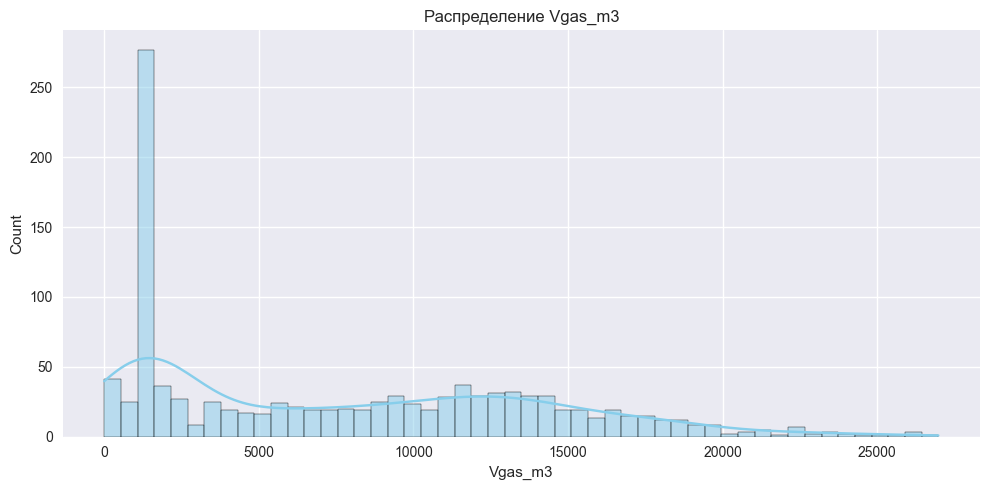

In [5]:
print("Основные статистики:")
display(df.describe())

# Гистограмма Vgas
plt.figure(figsize=(10, 5))
sns.histplot(df['Vgas_m3'], bins=50, kde=True, color='skyblue')
plt.title('Распределение Vgas_m3')
plt.xlabel('Vgas_m3')
plt.tight_layout()
plt.show()